# Forming a Cluter with flowers using Petal and length features from the iris dataset

In [144]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [145]:
iris= load_iris()

In [146]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [147]:
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [148]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Plotting a scatter graph

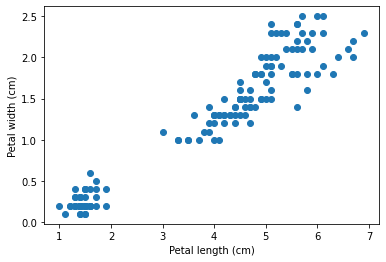

In [149]:
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.scatter(iris['petal length (cm)'], iris['petal width (cm)']);

In [150]:
del iris['sepal length (cm)'] 
del iris['sepal width (cm)']
iris.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Scale the Petal width and Petal height using MinMaxScaler

Scaling the petal length

In [151]:
scaler = MinMaxScaler()
scaler.fit(iris[['petal length (cm)']])
iris['petal length (cm)'] = scaler.transform(iris[['petal length (cm)']])
iris.head()

,petal length (cm),petal width (cm)
0,0.067797,0.2
1,0.067797,0.2
2,0.050847,0.2
3,0.084746,0.2
4,0.067797,0.2


Scaling the petal width

In [152]:
scaler.fit(iris[['petal width (cm)']])
iris['petal width (cm)'] = scaler.transform(iris[['petal width (cm)']])
iris.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


### Scatter Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


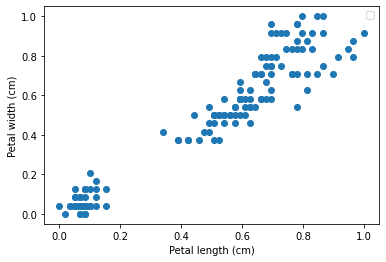

In [153]:
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

plt.legend()

plt.scatter(iris['petal length (cm)'], iris['petal width (cm)']);

### Creating Cluster with k of 2

In [154]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(iris[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [157]:
iris['cluster'] = y_predicted
iris.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [161]:
iris.rename({'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'}, axis=1, inplace =True)
iris.head()

,petal_length,petal_width,cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


## Plotting a K Means Scatterplot

In [160]:
df1 = iris[iris.cluster==0]
df2 = iris[iris.cluster==1]
df3 = iris[iris.cluster==2]

Text(0, 0.5, 'Petal width (cm)')

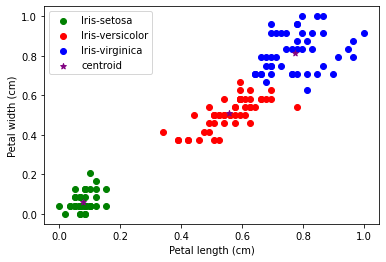

In [167]:
plt.scatter(df1.petal_length, df1.petal_width, color='green', label='Iris-setosa')
plt.scatter(df2.petal_length, df2.petal_width, color='red', label='Iris-versicolor')
plt.scatter(df3.petal_length, df3.petal_width, color='blue', label='Iris-virginica')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.legend()

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

In [169]:
k_rng = range(1, 10)

sse = [] 

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit([iris.petal_length, iris.petal_width])
    sse.append(km.inertia_)

ValueError: n_samples=2 should be >= n_clusters=3.